<a href="https://colab.research.google.com/github/anneaiad/Challenge1_DataScience_Alura/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [88]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [89]:
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print(f'Faturamento Loja 1: R${faturamento_loja1:,.2f}')
print(f'Faturamento Loja 2: R${faturamento_loja2:,.2f}')
print(f'Faturamento Loja 3: R${faturamento_loja3:,.2f}')
print(f'Faturamento Loja 4: R${faturamento_loja4:,.2f}')



Faturamento Loja 1: R$1,534,509.12
Faturamento Loja 2: R$1,488,459.06
Faturamento Loja 3: R$1,464,025.03
Faturamento Loja 4: R$1,384,497.58


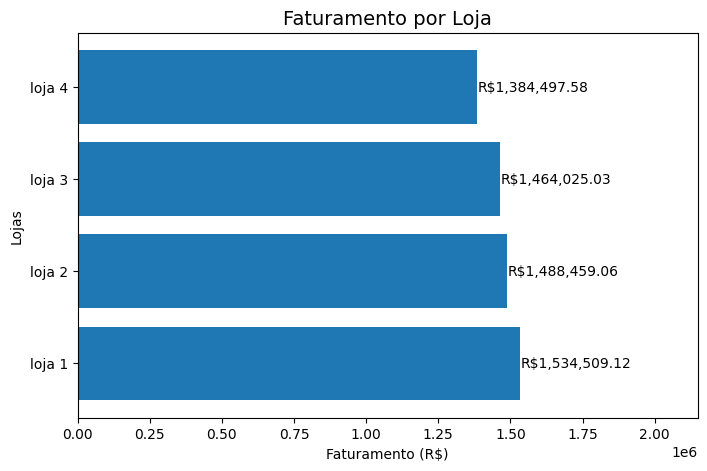

In [90]:
import matplotlib.pyplot as plt
lojas = ['loja 1', 'loja 2', 'loja 3', 'loja 4']
faturamento = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

plt.figure(figsize=(8, 5))
plt.barh(lojas, faturamento)

plt.title('Faturamento por Loja', fontsize=14)
plt.ylabel('Lojas')
plt.xlabel('Faturamento (R$)')


for i, valor in enumerate(faturamento):
    plt.text(valor + 500, i, f'R${valor:,.2f}', va='center')

plt.xlim(0, max(faturamento) * 1.4)
plt.show()

# De acordo com a análise de Faturamento Total por loja, a Loja 1 possui o maior faturamento e a Loja 4 o menor faturamento, com uma diferença de aproximadamente 150mil reais. As lojas 3 e 4 apresentam um faturamento parecido, com diferença de aproximadamente 24mil reais.

# 2. Vendas por Categoria


In [91]:
loja['Categoria do Produto'].unique()

array(['eletronicos', 'moveis', 'brinquedos', 'eletrodomesticos',
       'utilidades domesticas', 'esporte e lazer', 'livros',
       'instrumentos musicais'], dtype=object)

In [92]:
produtos = loja['Categoria do Produto'].value_counts().reset_index()
produtos

,Categoria do Produto,count
0,moveis,465
1,eletronicos,448
2,brinquedos,324
3,eletrodomesticos,312
4,esporte e lazer,284
5,instrumentos musicais,182
6,livros,173
7,utilidades domesticas,171


In [93]:
faturamento_por_categoria = loja.groupby('Categoria do Produto')['Preço'].sum()
print('Faturamento por Categoria Loja 1')
print(faturamento_por_categoria)

Faturamento por Categoria Loja 1
Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64


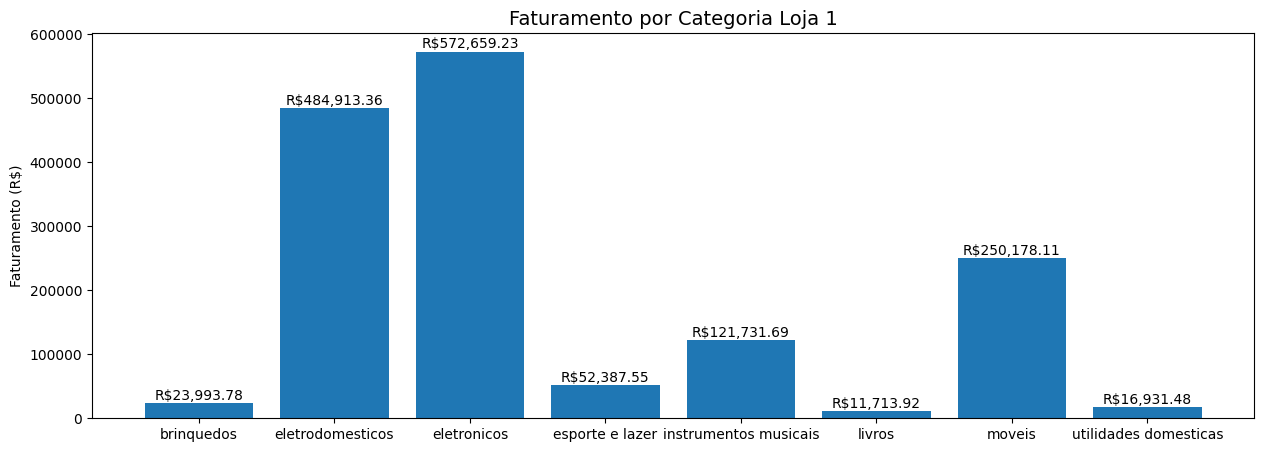

In [94]:
import matplotlib.pyplot as plt

categorias = faturamento_por_categoria.index
valores = faturamento_por_categoria.values

plt.figure(figsize=(15, 5))
plt.bar(categorias, valores)
plt.title('Faturamento por Categoria Loja 1', fontsize=14)
plt.ylabel('Faturamento (R$)')

for i, valor in enumerate(valores):
    plt.text(i, valor + 5000, f'R${valor:,.2f}', ha='center', fontsize=10)

plt.show()

In [95]:
faturamento_por_categoria2 = loja2.groupby('Categoria do Produto')['Preço'].sum()
print('Faturamento por Categoria Loja 2')
print(faturamento_por_categoria2)

Faturamento por Categoria Loja 2
Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64


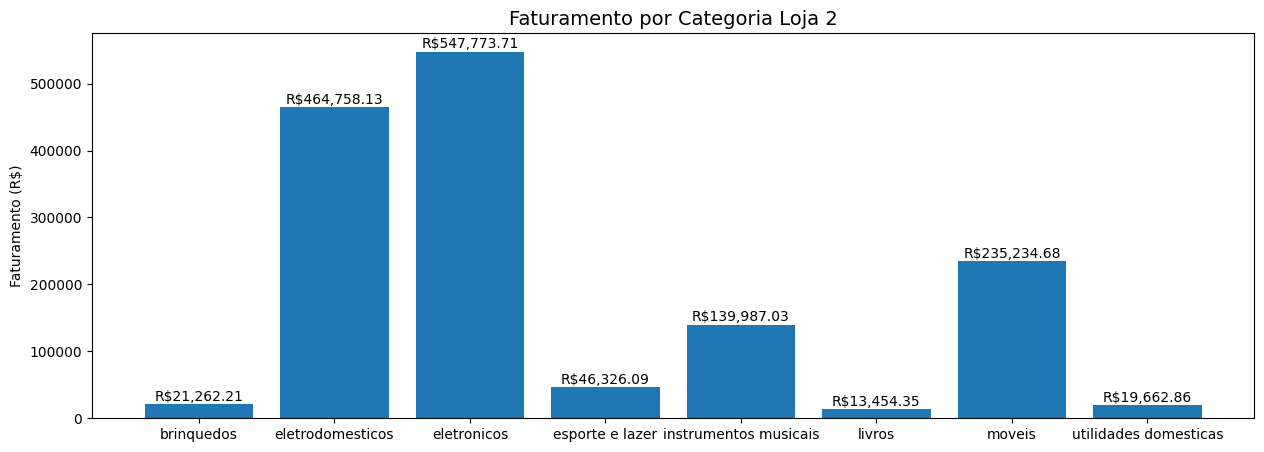

In [96]:
import matplotlib.pyplot as plt

categorias2 = faturamento_por_categoria2.index
valores2 = faturamento_por_categoria2.values

plt.figure(figsize=(15, 5))
plt.bar(categorias2, valores2)
plt.title('Faturamento por Categoria Loja 2', fontsize=14)
plt.ylabel('Faturamento (R$)')

for i, valor in enumerate(valores2):
    plt.text(i, valor + 5000, f'R${valor:,.2f}', ha='center', fontsize=10)

plt.show()

In [97]:
faturamento_por_categoria3 = loja3.groupby('Categoria do Produto')['Preço'].sum()
print('Faturamento por Categoria Loja 3')
print(faturamento_por_categoria3)

Faturamento por Categoria Loja 3
Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                    12664.70
moveis                   268095.56
utilidades domesticas     20080.21
Name: Preço, dtype: float64


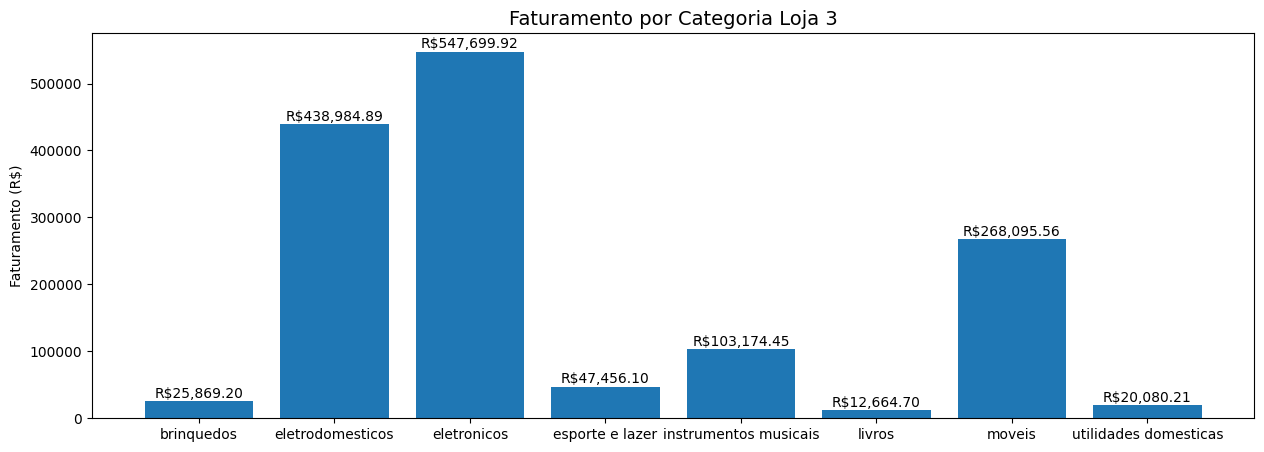

In [98]:
import matplotlib.pyplot as plt

categorias3 = faturamento_por_categoria3.index
valores3 = faturamento_por_categoria3.values

plt.figure(figsize=(15, 5))
plt.bar(categorias3, valores3)
plt.title('Faturamento por Categoria Loja 3', fontsize=14)
plt.ylabel('Faturamento (R$)')

for i, valor in enumerate(valores3):
    plt.text(i, valor + 5000, f'R${valor:,.2f}', ha='center', fontsize=10)

plt.show()

In [99]:
faturamento_por_categoria4 = loja4.groupby('Categoria do Produto')['Preço'].sum()
print('Faturamento por Categoria Loja 4')
print(faturamento_por_categoria4)

Faturamento por Categoria Loja 4
Categoria do Produto
brinquedos                27015.67
eletrodomesticos         377680.65
eletronicos              545966.86
esporte e lazer           44465.65
instrumentos musicais    100136.50
livros                    12427.77
moveis                   256705.65
utilidades domesticas     20098.83
Name: Preço, dtype: float64


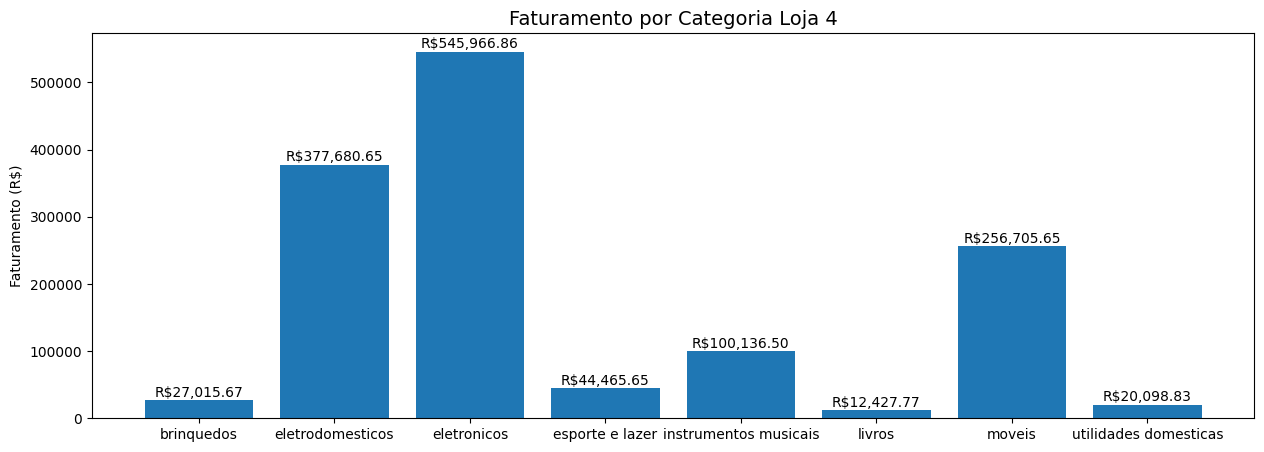

In [100]:
import matplotlib.pyplot as plt

categorias4 = faturamento_por_categoria4.index
valores4 = faturamento_por_categoria4.values

plt.figure(figsize=(15, 5))
plt.bar(categorias4, valores4)
plt.title('Faturamento por Categoria Loja 4', fontsize=14)
plt.ylabel('Faturamento (R$)')

for i, valor in enumerate(valores4):
    plt.text(i, valor + 5000, f'R${valor:,.2f}', ha='center', fontsize=10)

plt.show()

In [101]:
todas_lojas = pd.concat([loja, loja2, loja3, loja4])
faturamento_lojas_por_categoria = todas_lojas.groupby('Categoria do Produto')['Preço'].sum()
print(faturamento_lojas_por_categoria)

Categoria do Produto
brinquedos                 98140.86
eletrodomesticos         1766337.03
eletronicos              2214099.72
esporte e lazer           190635.39
instrumentos musicais     465029.67
livros                     50260.74
moveis                   1010214.00
utilidades domesticas      76773.38
Name: Preço, dtype: float64


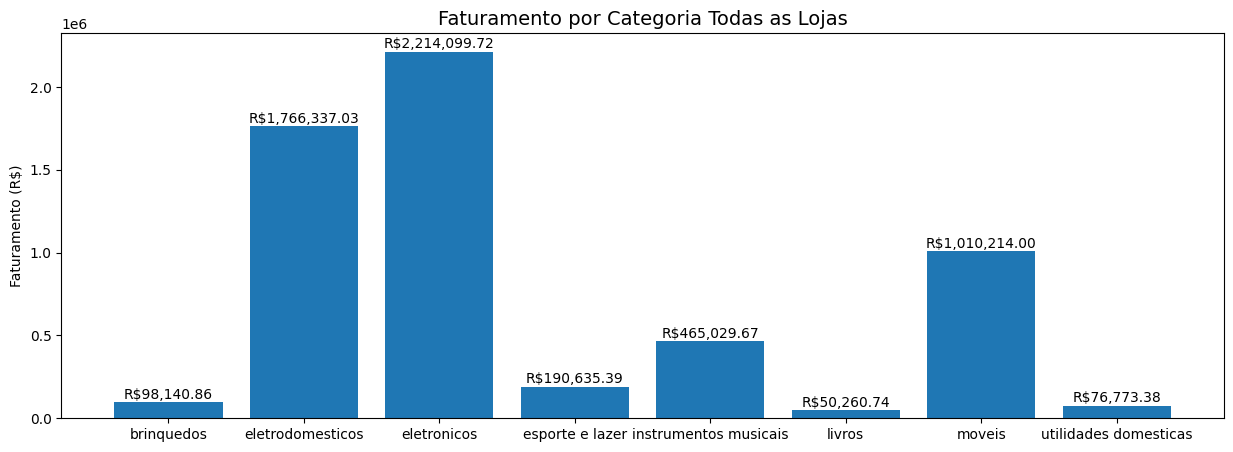

In [102]:
import matplotlib.pyplot as plt

categorias_todas_lojas = faturamento_lojas_por_categoria.index
valores_todas_lojas = faturamento_lojas_por_categoria.values

plt.figure(figsize=(15, 5))
plt.bar(categorias_todas_lojas, valores_todas_lojas)
plt.title('Faturamento por Categoria Todas as Lojas', fontsize=14)
plt.ylabel('Faturamento (R$)')


for i, valor in enumerate(valores_todas_lojas):
    plt.text(i, valor + 20000, f'R${valor:,.2f}', ha='center', fontsize=10)

plt.show()

# A partir da análise de faturamento por Categorias do Produto, podemos observar que as 4 Lojas possuem faturamentos proporcionalmente parecidos em relação a Categoria do Produto. Destacando-se a categoria Eletrônicos com o maior potencial de vendas em todas as lojas analisadas.

# 3. Média de Avaliação das Lojas

In [103]:
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [104]:
sorted(list(map(int, loja['Avaliação da compra'].unique())))

[1, 2, 3, 4, 5]

In [105]:
lojas = [loja, loja2, loja3, loja4]
avaliacao_labels = {1: 'Péssimo', 2: 'Ruim', 3: 'Regular', 4: 'Bom', 5: 'Ótimo'}

for df in lojas:
    df['avaliacao indicador'] = pd.Categorical(
        df['Avaliação da compra'],
        categories=[1, 2, 3, 4, 5],
        ordered=True
    )

    df['avaliacao indicador'] = df['avaliacao indicador'].map(avaliacao_labels)

In [106]:
loja3.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,avaliacao indicador
0,Secadora de roupas,eletrodomesticos,1713.50,88.823159,17/12/2021,Camila Ribeiro,CE,4,cartao_credito,4,-5.20,-39.53,Bom
1,Cômoda,moveis,386.81,18.180908,10/02/2021,Larissa Alves,RS,3,cartao_credito,1,-30.17,-53.50,Regular
2,Violão,instrumentos musicais,404.62,23.197592,22/01/2023,Lucas Oliveira,SP,5,cartao_credito,3,-22.19,-48.79,Ótimo
3,Bola de vôlei,esporte e lazer,78.40,4.463341,22/03/2022,Pedro Gomes,BA,4,cartao_credito,6,-13.29,-41.71,Bom
4,Guarda roupas,moveis,694.76,34.578319,12/01/2022,Bianca Santos,SP,1,cartao_credito,1,-22.19,-48.79,Péssimo


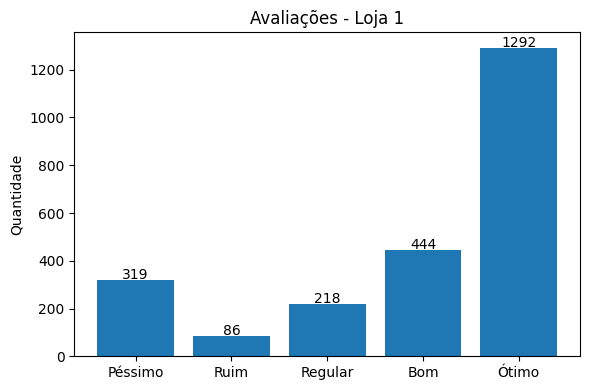

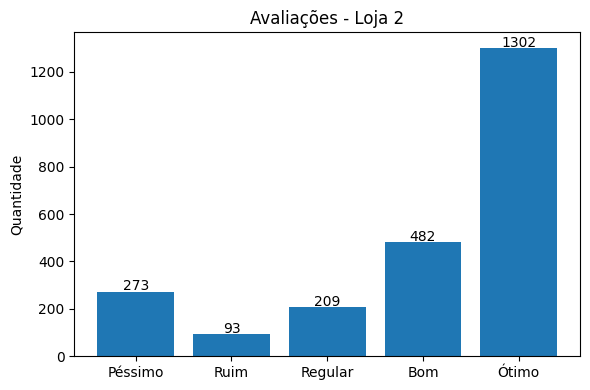

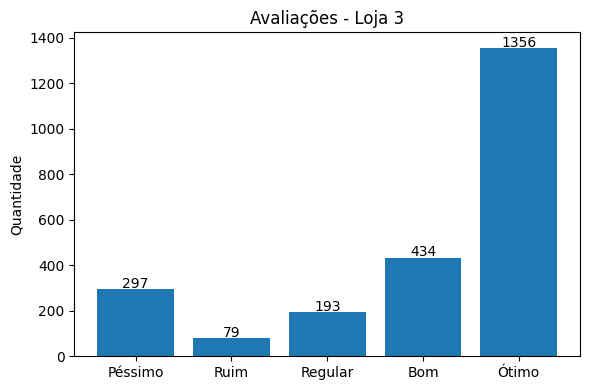

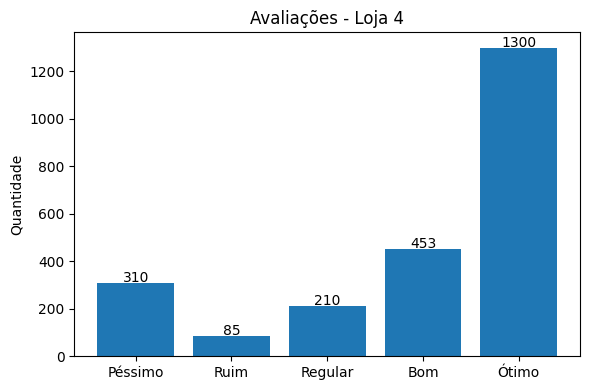

In [107]:
import matplotlib.pyplot as plt

lojas = [loja, loja2, loja3, loja4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

for df, nome in zip(lojas, nomes):
    contagem = df['avaliacao indicador'].value_counts().sort_index()

    plt.figure(figsize=(6, 4))
    plt.bar(contagem.index, contagem.values)

    for i, valor in enumerate(contagem.values):
        plt.text(i, valor + 5, str(valor), ha='center')

    plt.title(f'Avaliações - {nome}')
    plt.ylabel('Quantidade')
    plt.tight_layout()
    plt.show()

In [108]:
media_loja1 = loja['Avaliação da compra'].mean()
media_loja2 = loja2['Avaliação da compra'].mean()
media_loja3 = loja3['Avaliação da compra'].mean()
media_loja4 = loja4['Avaliação da compra'].mean()

print('Média das Avaliações da Compra por Loja')
print(f'Loja 1: {media_loja1:.2f}')
print(f'Loja 1: {media_loja2:.2f}')
print(f'Loja 1: {media_loja3:.2f}')
print(f'Loja 1: {media_loja4:.2f}')

Média das Avaliações da Compra por Loja
Loja 1: 3.98
Loja 1: 4.04
Loja 1: 4.05
Loja 1: 4.00


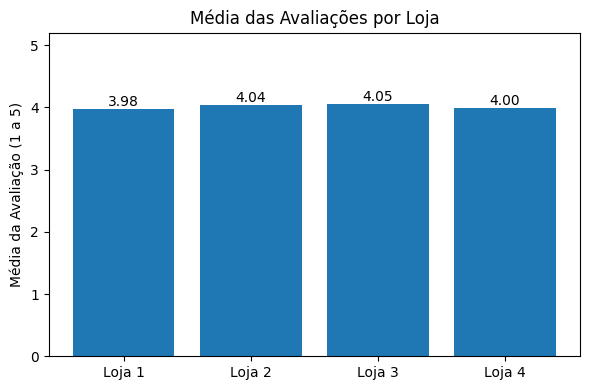

In [109]:
medias = [media_loja1, media_loja2, media_loja3, media_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(lojas, medias)


for i, media in enumerate(medias):
    plt.text(i, media + 0.05, f'{media:.2f}', ha='center')

plt.ylim(0, 5.2)
plt.title('Média das Avaliações por Loja')
plt.ylabel('Média da Avaliação (1 a 5)')
plt.tight_layout()

plt.show()

# Observamos pela análise da Média das Avaliações por Loja que a Loja 1 tem a menor pontuação e a Loja 3 a maior pontuação em relação a satisfação da compra.

# 4. Produtos Mais e Menos Vendidos

In [110]:
todas_lojas = pd.concat([loja, loja2, loja3, loja4])
vendas_por_produto = todas_lojas['Produto'].value_counts()

mais_vendido = vendas_por_produto.idxmax()
menos_vendido = vendas_por_produto.idxmin()

print('Produto mais vendido e menos vendido no total:')
print(f'Produto mais vendido: {mais_vendido} ({vendas_por_produto[mais_vendido]} vendas)')
print(f'Produto menos vendido: {menos_vendido} ({vendas_por_produto[menos_vendido]} vendas)')

Produto mais vendido e menos vendido no total:
Produto mais vendido: Cômoda (210 vendas)
Produto menos vendido: Celular ABXY (157 vendas)


In [111]:
lojas_todas = [loja, loja2, loja3, loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Loop para calcular o mais e o menos vendido por loja
for df, nome in zip(lojas_todas, lojas):
    vendas_por_produto = df['Produto'].value_counts()

    mais_vendido = vendas_por_produto.idxmax()
    menos_vendido = vendas_por_produto.idxmin()

    qtd_mais = vendas_por_produto.max()
    qtd_menos = vendas_por_produto.min()


    print(f'\n {nome}')
    print(f'→ Produto mais vendido: {mais_vendido} ({qtd_mais} vendas)')
    print(f'→ Produto menos vendido: {menos_vendido} ({qtd_menos} vendas)')


 Loja 1
→ Produto mais vendido: Micro-ondas (60 vendas)
→ Produto menos vendido: Headset (33 vendas)

 Loja 2
→ Produto mais vendido: Iniciando em programação (65 vendas)
→ Produto menos vendido: Jogo de tabuleiro (32 vendas)

 Loja 3
→ Produto mais vendido: Kit banquetas (57 vendas)
→ Produto menos vendido: Blocos de montar (35 vendas)

 Loja 4
→ Produto mais vendido: Cama box (62 vendas)
→ Produto menos vendido: Guitarra (33 vendas)


# 5. Frete Médio por Loja


In [112]:
frete_media_loja1 = loja['Frete'].mean()
frete_media_loja2 = loja2['Frete'].mean()
frete_media_loja3 = loja3['Frete'].mean()
frete_media_loja4 = loja4['Frete'].mean()

print('Média dos Valores do Frete por Loja')
print(f'Loja 1: R${frete_media_loja1:.2f}')
print(f'Loja 2: R${frete_media_loja2:.2f}')
print(f'Loja 3: R${frete_media_loja3:.2f}')
print(f'Loja 4: R${frete_media_loja4:.2f}')

Média dos Valores do Frete por Loja
Loja 1: R$34.69
Loja 2: R$33.62
Loja 3: R$33.07
Loja 4: R$31.28


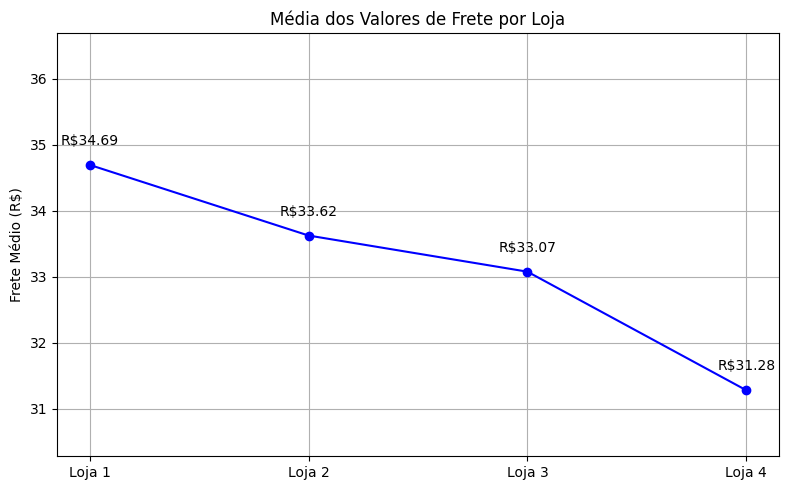

In [113]:
frete_medias = [frete_media_loja1, frete_media_loja2, frete_media_loja3, frete_media_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(lojas, frete_medias, marker='o', linestyle='-', color='blue')

for i, valor in enumerate(frete_medias):
    plt.text(lojas[i], valor + 0.3, f'R${valor:.2f}', ha='center')

plt.title('Média dos Valores de Frete por Loja')
plt.ylabel('Frete Médio (R$)')
plt.ylim(min(frete_medias) - 1, max(frete_medias) + 2)
plt.grid(True)
plt.tight_layout()
plt.show()

# Analisando a média de valores por frete, concluímos que a Loja 1 tem um custo médio maior sobre o frete em relação a outras lojas. E a Loja 4 tem o custo médio menor sobre o valor do frete.

Relatório de Análise de Desempenho – Lojas 1 a 4

Objetivo: Avaliar os principais indicadores de desempenho comercial das quatro lojas com base em dados de faturamento, categorias de produtos, produtos mais vendidos e menos vendidos, avaliações de clientes e custos de frete.

1. Faturamento Médio por Loja
A análise do faturamento médio revelou que a Loja 1 foi a que apresentou o maior desempenho comercial, registrando o maior faturamento médio entre as lojas. Por outro lado, a Loja 4 teve o menor faturamento médio, indicando menor volume de vendas ou ticket médio mais baixo.

2. Faturamento por Categoria de Produto
Ao analisar o faturamento por categoria, observamos que as 4 Lojas possuem faturamentos proporcionalmente parecidos em relação a Categoria do Produto. A categoria Eletrônicos se destacou como a mais lucrativa em todas as unidades.

No entanto, é importante destacar que:
A Loja 1 lidera o faturamento na categoria Eletrônicos.
A Loja 4 obteve o menor faturamento nessa categoria.

3. Avaliação da Compra
Com base nas médias das avaliações feitas pelos clientes:

A Loja 3 apresentou a melhor avaliação, refletindo uma boa experiência de compra.
A Loja 1, apesar do maior faturamento, obteve a menor média de avaliação, o que pode indicar problemas relacionados ao atendimento, entrega ou pós-venda.

4. Produtos Mais Vendidos e Menos Vendidos:
Observamos uma grande variedade de produtos que são mais vendidos e menos vendidos em cada loja e no total de cada loja. O que indica que o produto mais vendido e o menos vendido não impacta diretamente na comparação entre as lojas.

5. Custo Médio do Frete
Ao comparar o custo médio do frete:

A Loja 1 teve o frete mais caro entre as quatro.

A Loja 4 teve o menor custo de frete, o que teoricamente poderia favorecer as vendas. Contudo, mesmo com o custo médio de frete estando menor, ainda sim possui o menor faturamento entre as quatro. O que pode indicar que o preço do frete não está sendo decisivo para aumentar o volume de vendas na Loja 4.

6. Conclusão
Embora as quatro lojas apresentem desempenhos relativamente semelhantes em alguns aspectos, os dados indicam que a Loja 4 apresenta o desempenho mais fraco de forma geral.

Principais motivos:
Menor faturamento médio geral.
Menor faturamento na principal categoria (Eletrônicos).
Desempenho discreto nas avaliações dos clientes, sem destaque positivo.
Frete mais barato, porém sem impacto aparente no volume de vendas.

Esses indicadores sugerem que a Loja 4 seria a melhor opção para venda, pois no geral é a que possui menor desempenho entre as quatro lojas, nos indicadores analisados.